# The Best Neighborhood of Pittsburgh

In our quest to find the Best Neighborhood of Pittsburgh, our main metric was "quality of living." In our submetrics, we focused on entertainment and ease of travel and chores. We wanted to find 3 wildy different datasets and also relate them to one another. Courts and rinks represent entertainment, smart trash cans represent ease of chores, and steps represent ease of travel. We seeked areas with high numbers of smart trash cans, low numbers of steps, and high numbers of courts and rinks.

## Part 1: Smart Trash Cans

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv("SmartTrash.csv")

file.head(100)

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,278092,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,278093,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,278094,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,278095,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,278096,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,278187,101,74,2017-09-19T12:22:50,2022-08-23T13:13:22,1st Division,857 Western Ave,Pittsburgh,Pennsylvania,15233,Allegheny West,1.0,1.0,22.0,1-7,-80.016198,40.451999
96,278188,102,74,2017-09-19T12:22:50,2022-10-15T10:35:32,1st Division,900 Western Ave,Pittsburgh,Pennsylvania,15233,Allegheny West,1.0,1.0,22.0,1-7,-80.016690,40.451910
97,278189,103,74,2017-09-19T12:22:50,2022-11-05T13:14:00,1st Division,818 Western Ave,Pittsburgh,Pennsylvania,15233,Allegheny West,1.0,1.0,22.0,1-7,-80.014820,40.452330
98,278190,105,74,2017-09-19T12:22:50,2022-11-05T13:06:23,1st Division,540 E Ohio St,Pittsburgh,Pennsylvania,15212,East Allegheny,1.0,1.0,23.0,1-6,-79.999268,40.453812


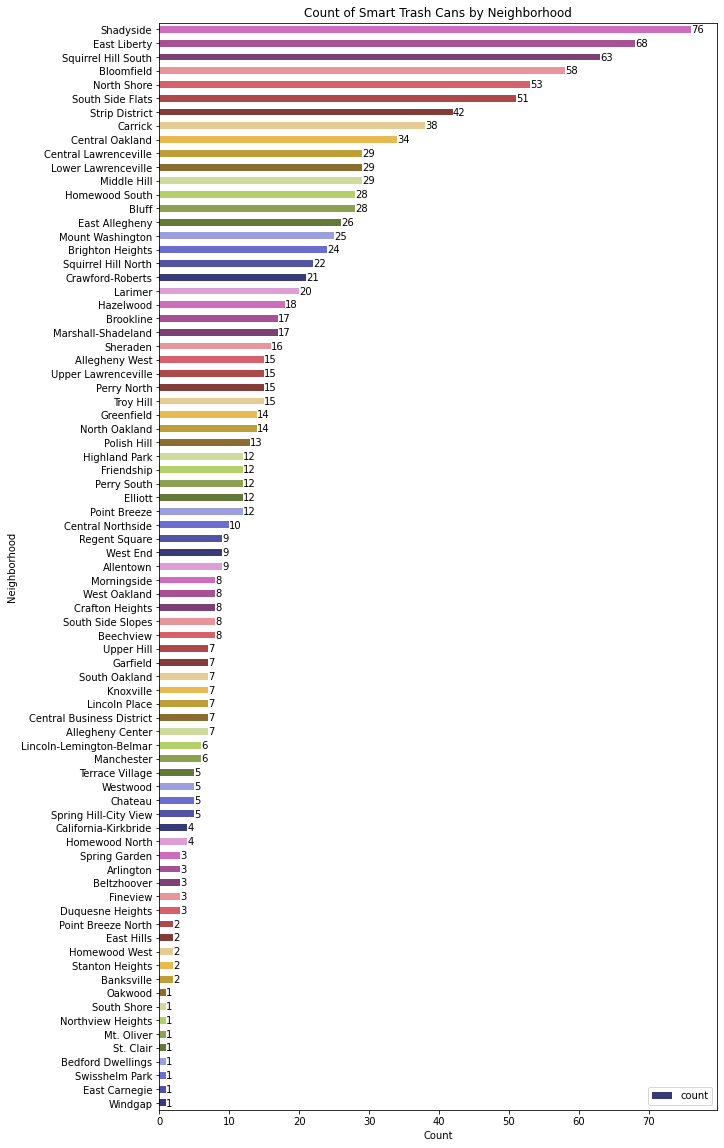

In [3]:
neighborhood_counts = file.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)

colors = plt.cm.tab20b.colors
ax = neighborhood_counts.plot(kind='barh', x='neighborhood', y='count', figsize=(10, 20), color=colors)

for index, value in enumerate(neighborhood_counts['count']):
    ax.text(value, index, str(value), ha='left', va='center')
    
plt.title('Count of Smart Trash Cans by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

## Part 2: Steps

In [4]:
# reads the steps csv file, then store only the number of 
# and the neighborhood in a separate frame 
steps = pd.read_csv("PittsburghSteps.csv", sep=",")
StepNumberFrame = steps[["number_of_steps", "neighborhood"]]

Text(0, 0.5, 'Neighborhood')

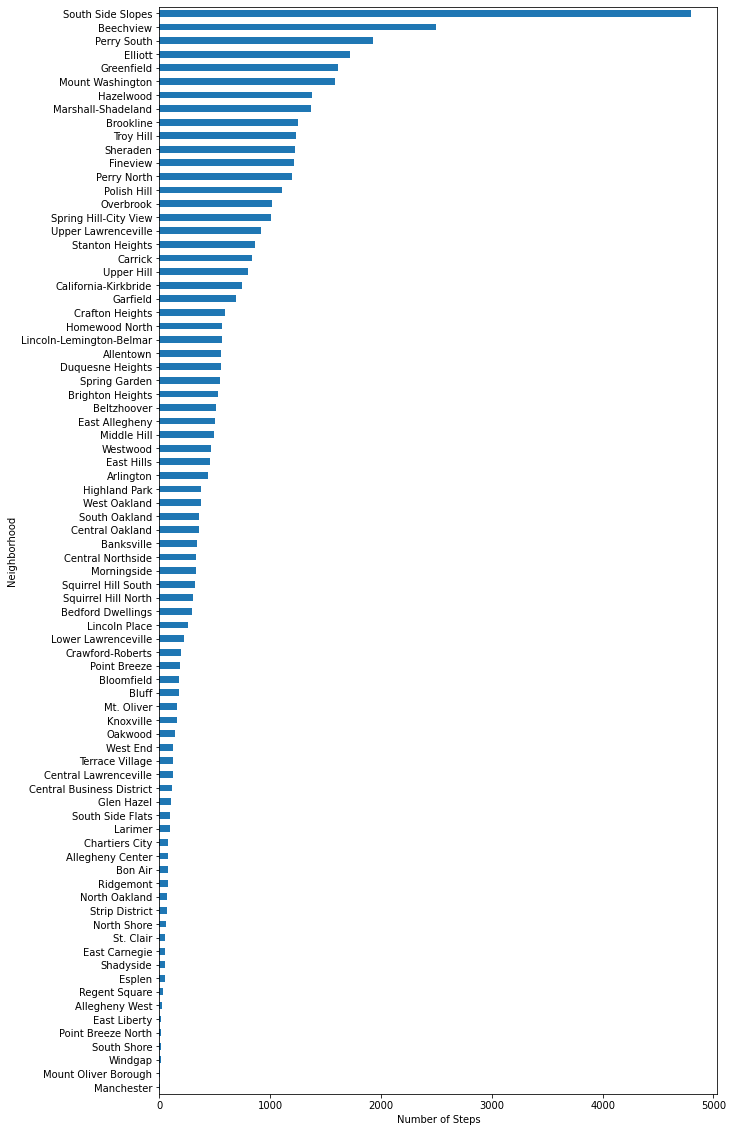

In [5]:
# total the number of steps for each location in the file, and display all in a graph
NumStepDist = StepNumberFrame.groupby("neighborhood").sum()['number_of_steps'].sort_values(ascending=True)
NumStepDistPlot = NumStepDist.plot.barh(x='number_of_steps', y='neighborhood', figsize=(10,20) )
NumStepDistPlot.set_xlabel("Number of Steps")
NumStepDistPlot.set_ylabel("Neighborhood")

Text(0, 0.5, 'Neighborhood')

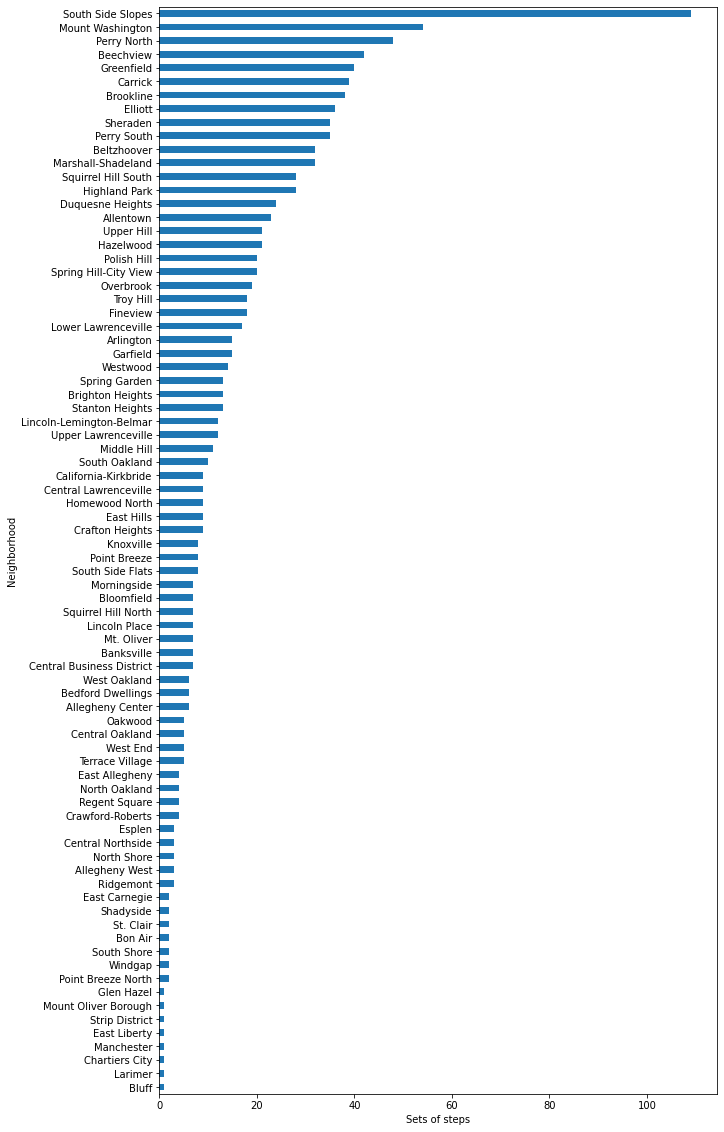

In [6]:
# total the sets of steps for each location in the file, and display all in a graph
stepDist = StepNumberFrame['neighborhood'].value_counts().sort_values(ascending=True)
stepDistPlot = stepDist.plot.barh(y = "neighborhood", figsize=(10,20) )
stepDistPlot.set_xlabel("Sets of steps")
stepDistPlot.set_ylabel("Neighborhood")

Based soley on the sets of stairs, Bluff, Larimer, Chartiers City, Manchester, and East Liberty are the best neighborhoods. 

## Part 3: Courts and Rinks

In [11]:
# Example file path, modify it according to your file location
file_path = "CourtsAndRinksData.csv"

# Read the CSV file
courtsrinks = pd.read_csv(file_path)

courtsrinks.head(100)

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1271269929,Highland Park Flynn Parklet Basketball Court 1,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478829,-79.918815
96,97,63568209,Highland Park Flynn Parklet Basketball Court 2,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478763,-79.918631
97,98,1563856270,Highland Park Flynn Parklet Hockey Court 1,Street Hockey,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478650,-79.918818
98,99,396643617,Highland Park Flynn Parklet Tennis Court 1,Tennis,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.479078,-79.918682


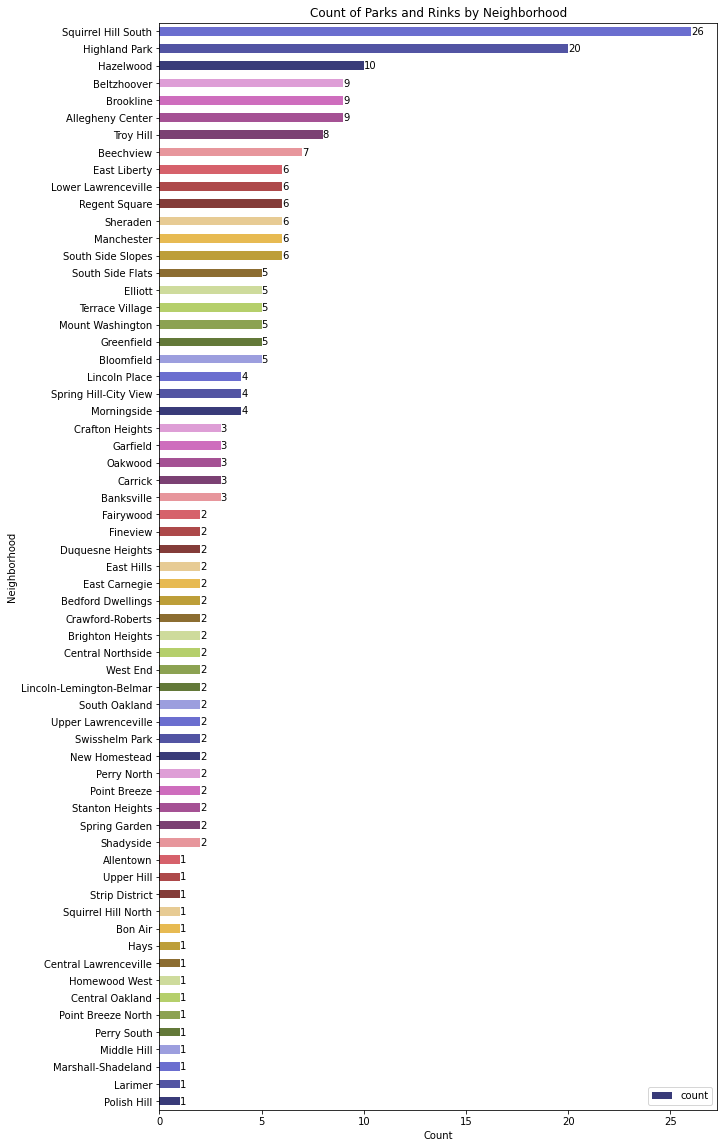

In [12]:
neighborhood_counts = courtsrinks.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)

colors = plt.cm.tab20b.colors
ax = neighborhood_counts.plot(kind='barh', x='neighborhood', y='count', figsize=(10, 20), color=colors)

for index, value in enumerate(neighborhood_counts['count']):
    ax.text(value, index, str(value), ha='left', va='center')
    
plt.title('Count of Parks and Rinks by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

## And the best neighborhood is...

**Squirell Hill South!**
  
With the calculation of all metrics, Squirell Hill South has proven to be the Best Neighborhood in all aspects.  
  
We are assigning a point system to each metric:
Smart Trash Cans add 2 point to the neighberhood
Sets of Steps subtract 1 point from the neighborhood
Courts/Rinks adds 1 point to the neighborhood

In [30]:
smart_trash_points = file['neighborhood'].value_counts().reset_index().rename(columns={'index': 'neighborhood', 'neighborhood': 'count'})
smart_trash_points['points'] = smart_trash_points['count'] * 2  # Assign 2 points for each smart trash can

steps_points = steps['neighborhood'].value_counts().reset_index().rename(columns={'index': 'neighborhood', 'neighborhood': 'count'})
steps_points['points'] = steps_points['count'] * -1  # Subtract 1 point for each set of steps

courts_rinks_points = courtsrinks['neighborhood'].value_counts().reset_index().rename(columns={'index': 'neighborhood', 'neighborhood': 'count'})
courts_rinks_points['points'] = courts_rinks_points['count']  # Assign 1 point for each court or rink

# Merge all point counts into a single DataFrame
neighborhood_points = pd.concat([smart_trash_points, steps_points, courts_rinks_points]).groupby('neighborhood').sum().reset_index()

# Print the points data
print("Points for each neighborhood:")
print(neighborhood_points)

Points for each neighborhood:
           neighborhood  count  points
0      Allegheny Center     24      21
1        Allegheny West      3      -3
2             Allentown     25     -20
3             Arlington     15     -15
4            Banksville     13       2
..                  ...    ...     ...
80  Upper Lawrenceville     16      -6
81             West End      9       1
82         West Oakland      6      -6
83             Westwood     14     -14
84              Windgap      2      -2

[85 rows x 3 columns]


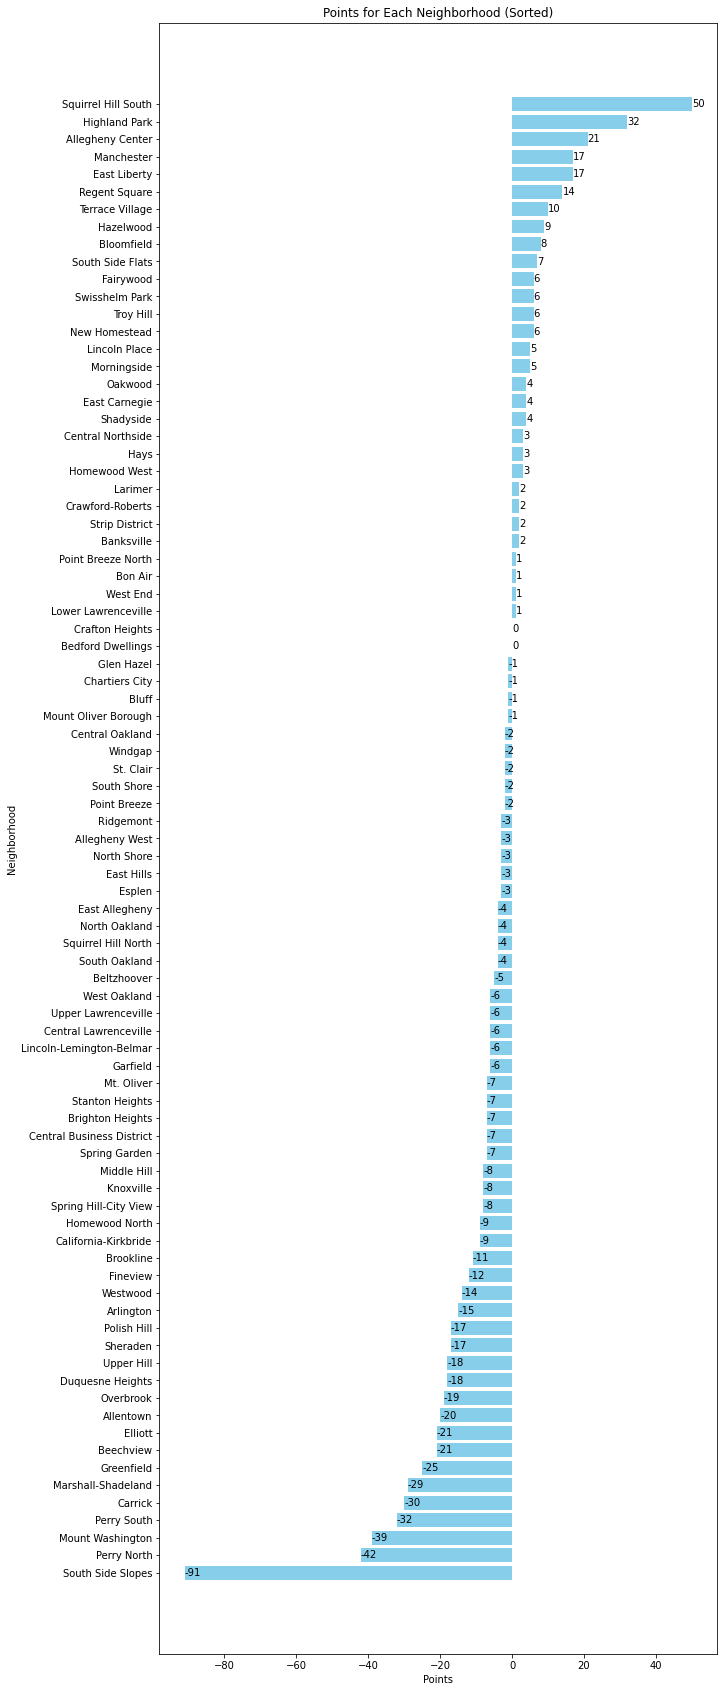

In [37]:
neighborhood_points_sorted = neighborhood_points.sort_values(by='points', ascending=True)

# Plot the points for each neighborhood
plt.figure(figsize=(10, 30))  # Increase the height of the figure
plt.barh(neighborhood_points_sorted['neighborhood'], neighborhood_points_sorted['points'], color='skyblue')

# Add labels for each point value
for index, value in enumerate(neighborhood_points_sorted['points']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.xlabel('Points')
plt.ylabel('Neighborhood')
plt.title('Points for Each Neighborhood (Sorted)')
plt.show()

## Conclusions

Nolan Le - I was surprised that South Side Slopes and Upper and Central Lawrence were low on the lists. Personally, I've been to both places and they are very nice and have a lot of things to do. However, the stairs and lack of smart trash cans and rinks may have been a big factor. Especially for the South Side Slopes, the stairs subtracted a majority of the points for it. Although our point system was arbitrary, coming up with that idea was a little difficult but eventually we came up with the current system. For the winner being Squirell Hill, they generally already have a a lot of entertainment and all of the shops are within walking distance, however they do have hills. 

Duc Huy Cao - In conclusion, this dataset provides valuable information about the parks and rinks, which can be used for various purposes such as urban planning, recreation, and maintenance. The dataset's structure and content suggest that it was created to facilitate analysis and decision-making related to the management of these public spaces.

Mark Zarroli - I was not surprised by the data. Since I am from the area, I am familiar with the nicer neighborhoods, so I assumed that places like Squirrel Hill would rank highly. I was not as familiar with Highland Park but after doing research it seems like a nice place so I understand its high ranking.